In [41]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data=pd.read_csv('/content/KNN_Project_Data')
data.head(2)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scalar=StandardScaler()

In [46]:
scalar.fit(data.drop('TARGET CLASS',axis=1))

StandardScaler()

In [47]:
feat=scalar.transform(data.drop('TARGET CLASS',axis=1))

In [48]:
data_feat=pd.DataFrame(feat,columns=data.columns[:-1])
data_feat.head(2)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X=feat
y=data['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn=KNeighborsClassifier(n_neighbors=1)

In [53]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [54]:
pred=knn.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix,classification_report

In [56]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[119  44]
 [ 50 117]]


              precision    recall  f1-score   support

           0       0.70      0.73      0.72       163
           1       0.73      0.70      0.71       167

    accuracy                           0.72       330
   macro avg       0.72      0.72      0.72       330
weighted avg       0.72      0.72      0.72       330



In [57]:
error_rate=[]

for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

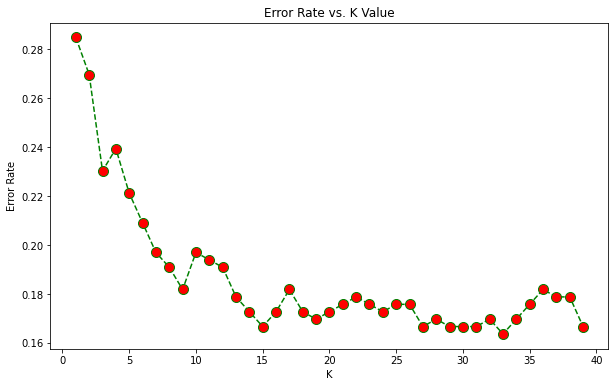

In [58]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,marker='o',ls='dashed',color='green',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [59]:
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[141  22]
 [ 33 134]]


              precision    recall  f1-score   support

           0       0.81      0.87      0.84       163
           1       0.86      0.80      0.83       167

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330

